# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.200636e+01     1.302392e+01
 * time: 0.0029261112213134766
     1     5.963617e+01     1.012441e+01
 * time: 0.008959054946899414
     2     5.480212e+01     1.521270e+01
 * time: 0.022084951400756836
     3     3.800770e+01     1.038491e+01
 * time: 0.12169194221496582
     4     2.803200e+01     8.612093e+00
 * time: 0.13998103141784668
     5     2.072655e+01     6.078695e+00
 * time: 0.15555810928344727
     6     1.915326e+01     6.927519e+00
 * time: 0.16849613189697266
     7     9.041431e+00     2.092457e+00
 * time: 0.1813211441040039
     8     7.199281e+00     2.144188e+00
 * time: 0.19435596466064453
     9     6.489491e+00     1.281054e+00
 * time: 0.20743513107299805
    10     6.295864e+00     1.321959e+00
 * time: 0.21785712242126465
    11     6.209041e+00     8.852424e-01
 * time: 0.22797107696533203
    12     6.138709e+00     5.732630e-01
 * time: 0.23841500282287598
    13     6.054548e+00     7.072334e-01
 * ti

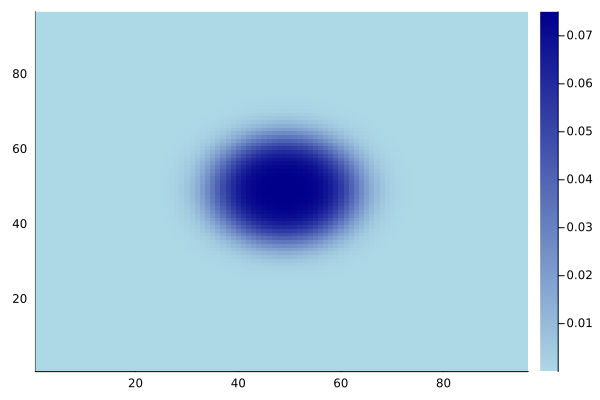

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)